In [283]:
def nthHarmonic(N,s) :

    harmonic = 1.00
    for i in range(2, N + 1) :
        harmonic += 1 / i**s

    return harmonic

def zipf_rvgen(low, high, N, size, a=6.) :
    choices = np.array(range(low, high+1))
    probs = choices**(-a) / nthHarmonic(N,a)
    return np.random.choice(choices,p=np.array(probs)/sum(probs),size=size)

def bino_gen(mu, length, size) :
    rst = [list(np.random.binomial(1, mu, length)).count(1) for i in range(size)]
    return rst

In [164]:
import json 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib

In [284]:
## import data 
dim = 3
level = 0

with open("../data/dim/"+str(dim)+"/level"+str(level)+"_levy_generation.json", "r") as jsonfile :
        generations = json.load(jsonfile)
        jsonfile.close()

with open("../data/dim/"+str(dim)+"/level"+str(level)+"_levy_data.json", "r")as jsonfile :
        data_all = json.load(jsonfile)
        jsonfile.close()

with open("../data/dim/"+str(dim)+"/level"+str(level)+"_levy_fitness.json", "r")as jsonfile :
    fitnesses = json.load(jsonfile)
    jsonfile.close()
mut_params = sorted(np.array(list(data_all.keys()), dtype=float))

In [285]:
gen_df = pd.DataFrame(generations)
gen_df 

,2.6,0.8,0.2,6.4,4.0,5.0,1.2,1.8,3.6,1.6,...,1.4,5.6,5.2,5.8,3.4,1.0,2.4,4.8,4.2,6.6
0,16,8,7,26,200,14,13,10,860,15,...,14,1000,1000,22,32,12,13,24,58,822
1,20,11,10,224,17,65,16,150,752,9,...,17,1000,718,1000,20,10,23,65,16,32
2,13,11,12,23,21,16,4,10,62,12,...,11,309,952,41,15,16,16,53,14,63
3,12,15,9,759,570,190,11,12,546,12,...,12,29,1000,952,229,14,19,11,772,1000
4,329,10,10,1000,14,1000,13,35,15,10,...,11,426,953,55,1000,16,26,19,22,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,11,15,6,15,12,16,7,9,11,9,...,10,1000,24,1000,16,19,182,1000,1000,25
146,12,8,9,16,24,17,13,21,23,12,...,18,386,88,1000,22,9,16,1000,525,44
147,9,12,11,1000,17,24,10,18,21,17,...,29,25,23,1000,37,10,11,196,16,1000
148,22,16,11,95,1000,459,12,11,16,11,...,10,540,17,19,95,10,19,1000,30,200


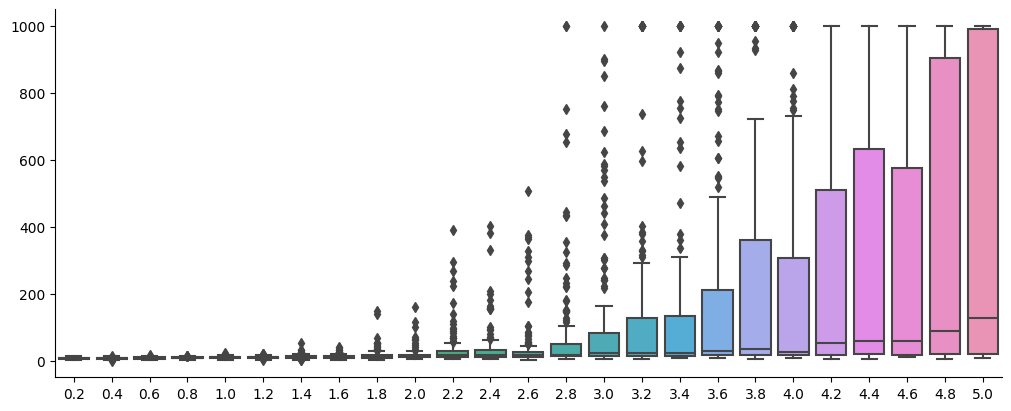

In [286]:
figure = plt.figure(constrained_layout=True, figsize=(10,4))
gs = figure.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
sns.boxplot([gen_df[str(c)] for c in mut_params[:25]])
plt.xticks(range(len(mut_params[:25])), mut_params[:25])
plt.show()

In [287]:
min_move = [min(data_all[str(c)]) for c in mut_params]
min_counts = [data_all[str(c)].count(min(data_all[str(c)])) for c in mut_params]

In [288]:
min_move, min_counts

([6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6],
 [9,
  13,
  10,
  7,
  9,
  18,
  11,
  14,
  23,
  19,
  12,
  14,
  21,
  18,
  15,
  18,
  18,
  15,
  10,
  8,
  20,
  12,
  16,
  10,
  10,
  10,
  10,
  7,
  9,
  10,
  13,
  15,
  14,
  16,
  12])

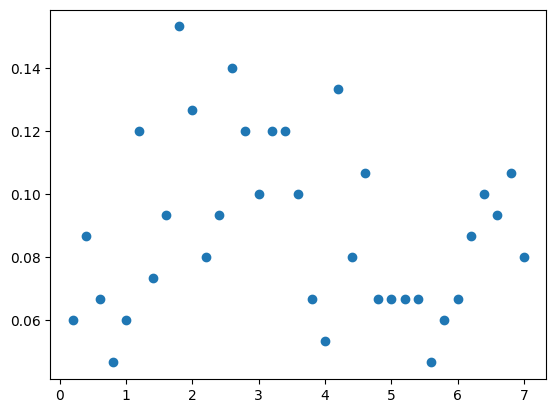

In [289]:
plt.plot(mut_params, np.array(min_counts, dtype=float)/150, 'o') 
plt.show()

<BarContainer object of 35 artists>

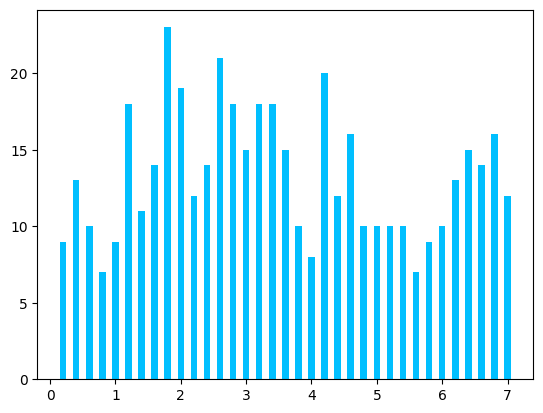

In [290]:
plt.bar(mut_params, min_counts, width=0.1, color='deepskyblue', align='center')

In [292]:
success_rate = [fitnesses[str(key)].count(1)/len(fitnesses[str(key)]) for key in mut_params]

In [293]:
success_rate

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9866666666666667,
 0.9933333333333333,
 0.9333333333333333,
 0.96,
 0.9466666666666667,
 0.9,
 0.92,
 0.88,
 0.8133333333333334,
 0.8266666666666667,
 0.76,
 0.7533333333333333,
 0.7666666666666667,
 0.72,
 0.6933333333333334,
 0.74,
 0.7,
 0.7066666666666667,
 0.6733333333333333,
 0.66,
 0.6666666666666666,
 0.64]

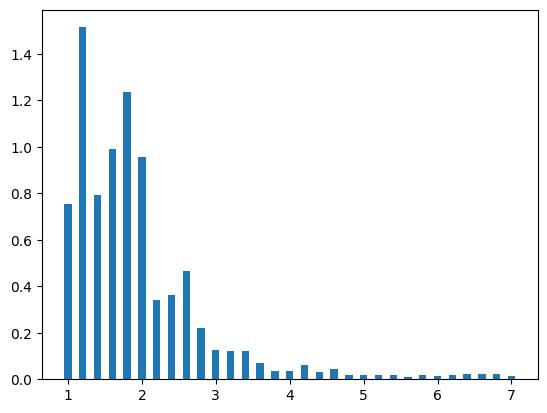

In [295]:
gen_data = np.array([np.mean(gen_df[str(c)]) for c in mut_params])
ratio = (np.array(min_counts, dtype=float)* np.array(success_rate))/gen_data
plt.bar(mut_params[4:], ratio[4:], width=0.1, align="center") 
plt.show()

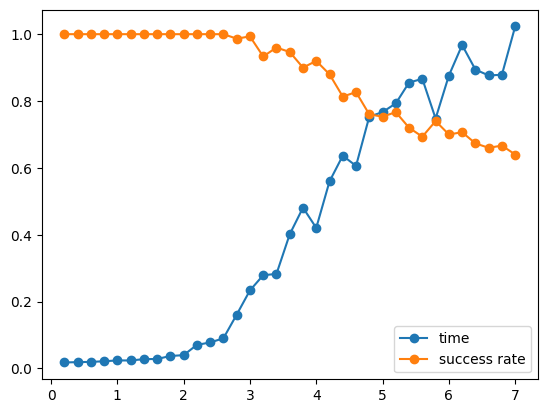

In [296]:
plt.plot(mut_params, gen_data/500, 'o-', label='time')
plt.plot(mut_params, success_rate, 'o-', label="success rate")
plt.legend()
plt.show()

In [297]:
min_counts

[9,
 13,
 10,
 7,
 9,
 18,
 11,
 14,
 23,
 19,
 12,
 14,
 21,
 18,
 15,
 18,
 18,
 15,
 10,
 8,
 20,
 12,
 16,
 10,
 10,
 10,
 10,
 7,
 9,
 10,
 13,
 15,
 14,
 16,
 12]

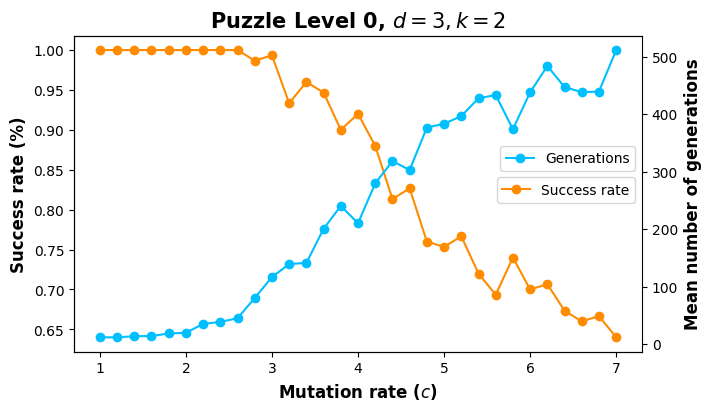

In [298]:
figure = plt.figure(constrained_layout=True, figsize=(7,4))
gs = figure.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
ax.spines["right"].set_visible(False)
#ax.spines["top"].set_visible(False)
plt.plot(mut_params[4:], success_rate[4:] , "o-", color="darkorange", label="Success rate")
plt.ylabel(r"Success rate (%)", weight="bold", fontsize=12)
plt.xlabel(r"Mutation rate ($c$)", weight="bold", fontsize=12)
plt.legend(loc='lower right',bbox_to_anchor=(1, 0.45))

ax3 = ax.twinx()
#ax3.spines["top"].set_visible(False)
ax3.set_ylabel(r'Mean number of generations',fontsize=12,weight="bold")
ax3.plot(mut_params[4:],[np.mean(generations[str(k)]) for k in mut_params][4:],"o-", color='deepskyblue', label="Generations")
plt.legend(loc='lower right',bbox_to_anchor=(1, 0.55))
plt.title("Puzzle Level "+str(level)+", $d=3, k=2$", fontsize=15,weight="bold")
plt.savefig("../images/mu_success_rate_dim3_level" +str(level)+".pdf")
plt.show()

In [299]:
N = 10000
zipf_dist = list(zipf_rvgen(1,70, 70, N, 1.4))
barplot_data = []

for i in set(zipf_dist) :
    barplot_data +=[[i,zipf_dist.count(i)]]

barplot_data = np.array(barplot_data)
p = barplot_data[:,1]/sum(barplot_data[:,1])
mean_zipf = sum(p*barplot_data[:,0])
print(f"The mean of the Zipf's distribution is {mean_zipf}")
print(mean_zipf/4)
mu = 0.25 #mean_zipf/args.length
print(f"The Binomial mutation rate is {mu}")
bino_dist = bino_gen(mu, 70, N)

The mean of the Zipf's distribution is 7.503299999999999
1.8758249999999999
The Binomial mutation rate is 0.25


In [300]:
barplot_data_bino = []
for i in set(bino_dist) :
    barplot_data_bino +=[[i,bino_dist.count(i)]]

barplot_data_bino = np.array(barplot_data_bino)

In [322]:
len(mut_params), len(min_counts)

(35, 35)

[9, 10, 8, 11, 9, 15, 9, 10, 6, 7, 10, 9, 7, 6, 7, 8, 10, 11, 7, 12, 7, 8, 10, 9, 10, 11, 6, 9, 11, 6, 9, 6, 12, 12, 11, 6, 6, 12, 8, 9, 10, 8, 10, 7, 9, 7, 7, 10, 9, 7, 6, 6, 6, 8, 8, 17, 10, 9, 8, 6, 8, 11, 7, 7, 10, 7, 12, 8, 10, 9, 9, 8, 12, 9, 9, 7, 8, 7, 6, 6, 9, 7, 9, 11, 6, 7, 7, 6, 8, 7, 6, 13, 9, 8, 7, 7, 8, 9, 8, 7, 8, 9, 8, 12, 9, 8, 8, 6, 13, 7, 7, 6, 9, 8, 7, 6, 7, 7, 8, 7, 14, 8, 10, 10, 6, 11, 8, 14, 6, 10, 8, 6, 8, 13, 9, 9, 10, 11, 8, 12, 7, 7, 10, 7, 6, 7, 11, 11, 7, 13] {6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17} 150


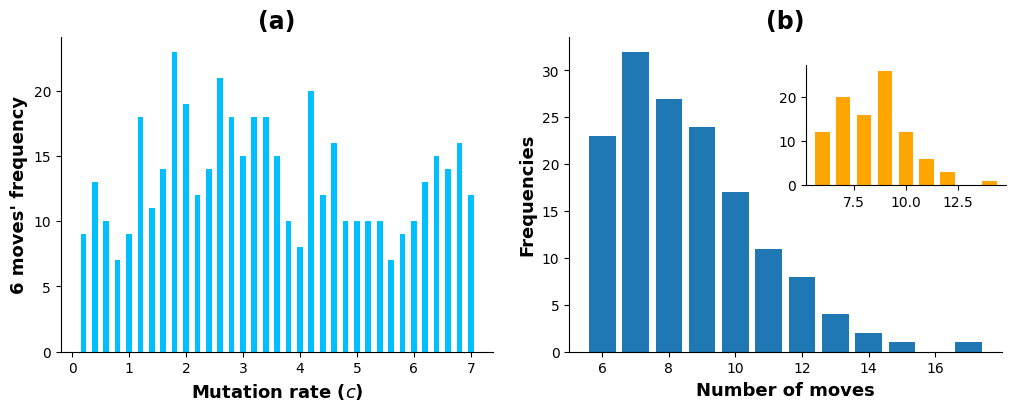

In [326]:
dim = 3 
level = 0 
figure = plt.figure(constrained_layout=True, figsize=(10,4))
gs = figure.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("(a)", fontsize=17,weight="bold")
ratio = (np.array(min_counts, dtype=float)* np.array(success_rate))/gen_data
#ax.plot(mut_params[4:], ratio[4:], "o-", color="deepskyblue") 
ax.bar(mut_params, min_counts, width=0.1, align="center", color="deepskyblue") 
plt.ylabel("6 moves' frequency", fontsize=13, weight='bold')
plt.xlabel(r"Mutation rate ($c$)", weight="bold", fontsize=13)

ax = figure.add_subplot(gs[0,1])
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
# plt.xlabel("Point mutations", fontsize=10, weight='bold')
# plt.ylabel("Frequency", fontsize=10, weight='bold')
# plt.bar(barplot_data_bino[:,0], barplot_data_bino[:,1], width=.8, align='center', log=True, label=r"Binomial with $\mu*="+str(np.round(mu,3))+"$", color="darkorange")
# plt.bar(barplot_data[:,0], barplot_data[:,1], width=.4, align='center', log=True, label=r"Zipf with $c*="+str(1.4)+"$", alpha=0.5, color="deepskyblue")
# plt.legend()
histo_data = data_all["1.8"]
print(histo_data, set(histo_data), len(histo_data))
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel(r"Number of moves", weight='bold', fontsize=13)
ax.set_ylabel(r"Frequencies", weight="bold", fontsize=13)
ax.bar(list(set(histo_data)), [histo_data.count(s) for s in list(set(histo_data))],  width=.8, align='center')
plt.title("(b)", fontsize=17,weight="bold")
# plt.title("Puzzle Level "+str(level), fontsize=17,weight="bold")
ax2 = plt.axes([0.8, 0.55, 0.20, 0.3])
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
histo_data = np.array(histo_data_7)
plot_data = histo_data[histo_data<25].tolist()
ax2.bar(list(set(plot_data)), [plot_data.count(s) for s in sorted(set(plot_data))],  width=.7, align='center', color="orange")
# plt.savefig("../images/best_cvalue"+str(dim)+"_level" +str(level)+"number_of_move.pdf")
plt.savefig("../images/best_cvalue"+str(dim)+"_level" +str(level)+".pdf")
plt.savefig("../images/best_cvalue"+str(dim)+"_level" +str(level)+".svg")
plt.show()

[9, 9, 6, 9, 8, 7, 8, 7, 9, 9, 7, 10, 9, 6, 9, 10, 11, 11, 8, 9, 12, 9, 10, 6, 9, 8, 6, 10, 7, 9, 11, 7, 7, 6, 6, 9, 10, 7, 8, 10, 7, 7, 10, 10, 9, 6, 9, 8, 7, 8, 7, 11, 8, 9, 9, 8, 9, 8, 11, 8, 7, 8, 7, 6, 6, 6, 10, 7, 9, 9, 9, 8, 10, 6, 7, 9, 10, 9, 11, 9, 7, 7, 12, 6, 9, 10, 7, 14, 8, 7, 8, 9, 12, 9, 8, 7] {6, 7, 8, 9, 10, 11, 12, 14} 96


<BarContainer object of 8 artists>

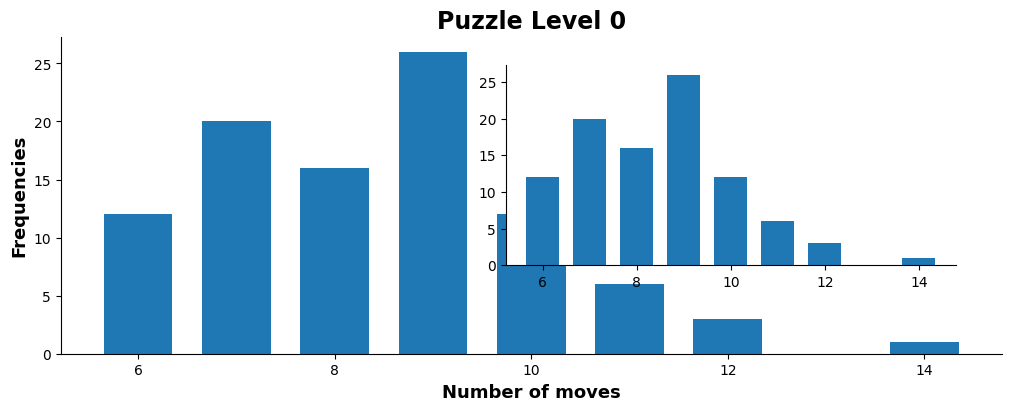

In [309]:
histo_data_7 = data_all["7.0"]
print(histo_data_7, set(histo_data_7), len(histo_data_7))
figure = plt.figure(constrained_layout=True, figsize=(10,4))
gs = figure.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
#ax.set_yscale("log")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel(r"Number of moves", weight='bold', fontsize=13)
ax.set_ylabel(r"Frequencies", weight="bold", fontsize=13)
ax.bar(list(set(histo_data_7)), [histo_data_7.count(s) for s in list(set(histo_data_7))],  width=.7, align='center')
plt.title("Puzzle Level "+str(level), fontsize=17,weight="bold")
ax2 = plt.axes([0.5, 0.35, 0.45, 0.5])
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
histo_data = np.array(histo_data_7)
plot_data = histo_data[histo_data<25].tolist()
ax2.bar(list(set(plot_data)), [plot_data.count(s) for s in sorted(set(plot_data))],  width=.7, align='center')


[9, 10, 8, 11, 9, 15, 9, 10, 6, 7, 10, 9, 7, 6, 7, 8, 10, 11, 7, 12, 7, 8, 10, 9, 10, 11, 6, 9, 11, 6, 9, 6, 12, 12, 11, 6, 6, 12, 8, 9, 10, 8, 10, 7, 9, 7, 7, 10, 9, 7, 6, 6, 6, 8, 8, 17, 10, 9, 8, 6, 8, 11, 7, 7, 10, 7, 12, 8, 10, 9, 9, 8, 12, 9, 9, 7, 8, 7, 6, 6, 9, 7, 9, 11, 6, 7, 7, 6, 8, 7, 6, 13, 9, 8, 7, 7, 8, 9, 8, 7, 8, 9, 8, 12, 9, 8, 8, 6, 13, 7, 7, 6, 9, 8, 7, 6, 7, 7, 8, 7, 14, 8, 10, 10, 6, 11, 8, 14, 6, 10, 8, 6, 8, 13, 9, 9, 10, 11, 8, 12, 7, 7, 10, 7, 6, 7, 11, 11, 7, 13] {6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17} 150


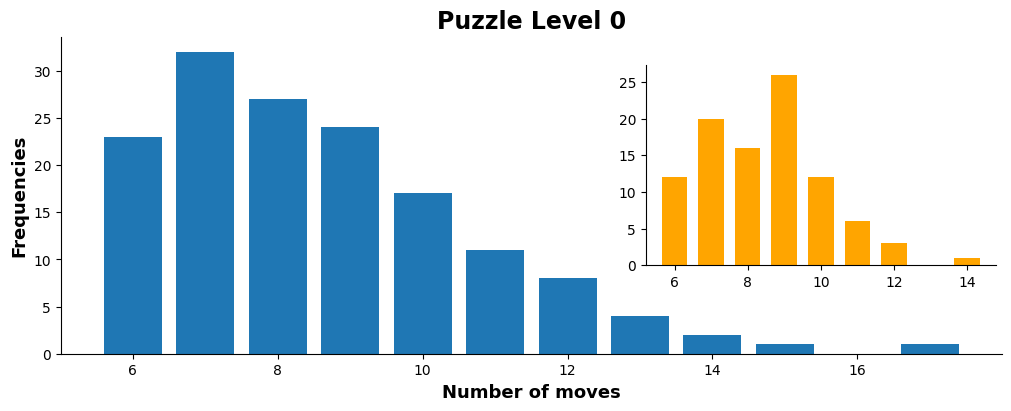

In [310]:
histo_data = data_all["1.8"]
print(histo_data, set(histo_data), len(histo_data))
figure = plt.figure(constrained_layout=True, figsize=(10,4))
gs = figure.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
#ax.set_yscale("log")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel(r"Number of moves", weight='bold', fontsize=13)
ax.set_ylabel(r"Frequencies", weight="bold", fontsize=13)
ax.bar(list(set(histo_data)), [histo_data.count(s) for s in list(set(histo_data))],  width=.8, align='center')
plt.title("Puzzle Level "+str(level), fontsize=17,weight="bold")
ax2 = plt.axes([0.64, 0.35, 0.35, 0.5])
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
histo_data = np.array(histo_data_7)
plot_data = histo_data[histo_data<25].tolist()
ax2.bar(list(set(plot_data)), [plot_data.count(s) for s in sorted(set(plot_data))],  width=.7, align='center', color="orange")
plt.savefig("../images/best_cvalue"+str(dim)+"_level" +str(level)+"number_of_move.pdf")

In [311]:
histo_data = data_all["7.0"]
histo_data.count(6)

12

In [312]:
histo_data = data_all["7.0"]
[histo_data.count(mm) for mm in [6,7,8]]

[12, 20, 16]

In [313]:
histo_data = data_all["1.8"]
[histo_data.count(mm) for mm in [6,7,8]]

[23, 32, 27]

In [314]:
histo_data = data_all["5.0"]
[histo_data.count(mm) for mm in [6,7,8]]

[10, 21, 23]

In [315]:
number_of_levels = 3
dim = 3 

all_level_data = []
for i in range(number_of_levels):
    with open("../data/dim/"+str(dim)+"/level"+str(i)+"_levy_data.json", "r")as jsonfile :
        all_level_data  += [json.load(jsonfile)]
        jsonfile.close()

8.0 {6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17}
11.0 {7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
14.0 {9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}


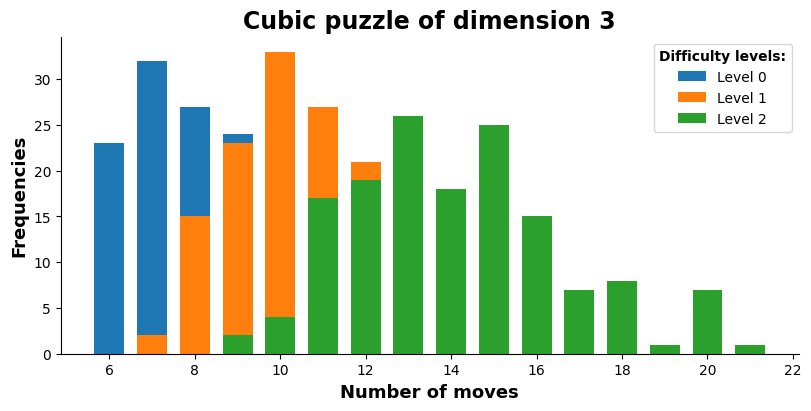

In [316]:
figure = plt.figure(constrained_layout=True, figsize=(8,4))
gs = figure.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel(r"Number of moves", weight='bold', fontsize=13)
ax.set_ylabel(r"Frequencies", weight="bold", fontsize=13)
plt.title("Cubic puzzle of dimension "+str(dim), fontsize=17,weight="bold")

#ax2 = plt.axes([0.4, 0.35, 0.45, 0.5])
#ax2.spines["right"].set_visible(False)
#ax2.spines["top"].set_visible(False)
title_fontproperties = matplotlib.font_manager.FontProperties(weight="bold")
best_mu = "1.8"
colors = ['blue', 'orange', 'green', 'red']
for i in range(number_of_levels) :
    histo_data = all_level_data[i][best_mu]
    print(np.median(histo_data), set(histo_data))
    bar = ax.bar(list(set(histo_data)), [histo_data.count(s) for s in list(set(histo_data))],  width=.7, align='center')
    bar.set_label("Level "+str(i))
    #ax2.bar(sorted(set(histo_data))[:13], [histo_data.count(s) for s in sorted(set(histo_data))[:13]],  width=.7, align='center')

ax.legend(title="Difficulty levels:", title_fontproperties=title_fontproperties)
plt.savefig("../images/mu_"+best_mu+"prime_histo_dim_"+str(dim)+"_alllevels.pdf")
plt.show()

In [317]:
number_of_levels = 4
dim = 4

all_level_data = []
for i in range(number_of_levels):
    with open("../data/dim/"+str(dim)+"/level"+str(i)+"_levy_data.json", "r")as jsonfile :
        all_level_data  += [json.load(jsonfile)]
        jsonfile.close()

[15, 13, 32, 27, 47, 13] {32, 13, 47, 15, 27}
[103, 39, 14, 21] {21, 39, 14, 103}
[51, 386, 178] {178, 386, 51}
[108, 170, 424, 483, 156] {483, 424, 170, 108, 156}


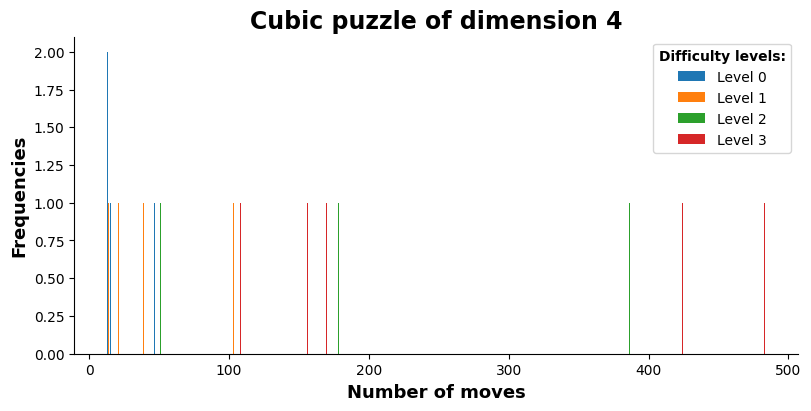

In [318]:
figure = plt.figure(constrained_layout=True, figsize=(8,4))
gs = figure.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel(r"Number of moves", weight='bold', fontsize=13)
ax.set_ylabel(r"Frequencies", weight="bold", fontsize=13)
plt.title("Cubic puzzle of dimension "+str(dim), fontsize=17,weight="bold")

#ax2 = plt.axes([0.4, 0.35, 0.45, 0.5])
#ax2.spines["right"].set_visible(False)
#ax2.spines["top"].set_visible(False)
title_fontproperties = matplotlib.font_manager.FontProperties(weight="bold")
best_mu = "1.0"
colors = ['blue', 'orange', 'green', 'red']
for i in range(number_of_levels) :
    histo_data = all_level_data[i][best_mu]
    print(histo_data, set(histo_data))
    bar = ax.bar(list(set(histo_data)), [histo_data.count(s) for s in list(set(histo_data))],  width=.7, align='center')
    bar.set_label("Level "+str(i))
    #ax2.bar(sorted(set(histo_data))[:13], [histo_data.count(s) for s in sorted(set(histo_data))[:13]],  width=.7, align='center')

ax.legend(title="Difficulty levels:", title_fontproperties=title_fontproperties)
#plt.savefig("../images/mu_"+best_mu+"prime_histo_dim_"+str(dim)+"_alllevels.pdf")
plt.show()

In [161]:
print(f"{}{2}".format(2,2))

22


# A^* Search analyis

In [168]:
d = 3 
k = 2 
l = 4 
level = 1 
njob = 200
log_folder = "../data/as/dim/"+str(d)+"/k/"+str(k)+"/level"+str(level)+"/"
as_df = pd.read_csv(log_folder+"as_solutions"+str(njob)+".csv")

In [169]:
as_df

,Unnamed: 0,d,k,l,level,Min,Moves
0,0,3,2,4,1,7,"[(2.0, 'blue'), (3.0, 'red'), (0.0, 'purple'),..."
1,1,3,2,4,1,7,"[(2.0, 'blue'), (3.0, 'red'), (0.0, 'purple'),..."
2,2,3,2,4,1,7,"[(2.0, 'blue'), (3.0, 'red'), (0.0, 'purple'),..."
3,3,3,2,4,1,7,"[(2.0, 'blue'), (3.0, 'red'), (0.0, 'purple'),..."
4,4,3,2,4,1,7,"[(2.0, 'blue'), (3.0, 'red'), (0.0, 'purple'),..."
...,...,...,...,...,...,...,...
195,195,3,2,4,1,7,"[(2.0, 'blue'), (3.0, 'red'), (0.0, 'purple'),..."
196,196,3,2,4,1,7,"[(2.0, 'blue'), (3.0, 'red'), (0.0, 'purple'),..."
197,197,3,2,4,1,7,"[(2.0, 'blue'), (3.0, 'red'), (0.0, 'purple'),..."
198,198,3,2,4,1,7,"[(2.0, 'blue'), (3.0, 'red'), (0.0, 'purple'),..."


In [172]:
set(as_df['Min'].values)

{7}

In [177]:
as_data = np.load("../src/rl/RL_runs_dict.npy", allow_pickle=True)

In [232]:
d = 3 
k = 2 
levels = [0,1,2]
as_levels_data = {}
all_data_level3 = []
for l in levels: 
    as_levels_data[l] = as_data.tolist()[(d,k,l)]
    all_data_level3 += [[d, k, l]]*len(as_data.tolist()[(d,k,l)])
    print(as_data.tolist()[(d,k,l)])

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 7, 7, 6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 7, 6, 6, 7, 7, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 7, 7, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6]
[7, 7, 7, 8, 7, 9, 8, 8, 7, 9, 8, 7, 7, 8, 9, 8, 7, 8, 8, 8, 7, 7, 8, 7, 7, 8, 8, 8, 7, 7, 7, 7, 8, 7, 8, 7, 8, 7, 8, 7, 8, 8, 7, 8, 7, 7, 8, 8, 8, 7, 7, 7, 8, 8, 7, 7, 8, 8, 7, 8, 7, 8, 8, 8, 8, 7, 8, 7, 8, 7, 8, 7, 7, 7, 8, 8, 7, 8, 8, 7, 7, 7, 7, 7, 7, 8, 7, 8, 8, 7, 7, 7, 8, 8, 8, 7, 8, 7, 8, 8, 8, 7, 7, 7, 8, 7, 8, 7, 7, 7, 8, 8, 7, 7, 7, 8, 8, 7, 7, 7, 7, 8, 7, 7, 7, 7, 8, 7, 9, 9, 7, 7, 8, 7, 7, 8, 8, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 8, 7, 7]
[9, 10, 9, 10, 10, 10, 10, 10, 10, 9, 10, 9, 10, 10, 9, 11, 11, 10, 10, 9, 10, 10, 11, 9, 9, 9, 10

In [227]:
len(all_data_level3)

450

In [255]:
df_as_data = pd.DataFrame(all_data_level3, columns=['d', 'k', 'Level'])
df_as_data

,d,k,Level
0,3,2,0
1,3,2,0
2,3,2,0
3,3,2,0
4,3,2,0
...,...,...,...
895,3,1,2
896,3,1,2
897,3,1,2
898,3,1,2


In [222]:
df_as_data["Number of moves"] = pd.Series(as_levels_data[0]+as_levels_data[1]+as_levels_data[2])

In [223]:
df_as_data

,d,k,level,Number of moves
0,3,2,0,6
1,3,2,0,6
2,3,2,0,6
3,3,2,0,6
4,3,2,0,6
...,...,...,...,...
445,3,2,2,10
446,3,2,2,10
447,3,2,2,9
448,3,2,2,10


In [200]:
import seaborn as sns 

<Axes: xlabel='level', ylabel='Number of moves'>

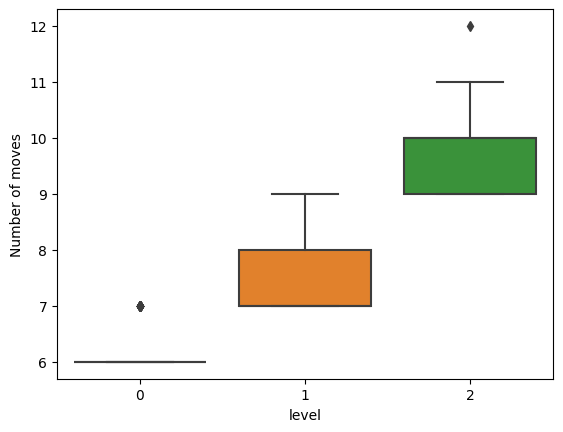

In [224]:
sns.boxplot(df_as_data, x ="level", y="Number of moves")

In [268]:
d = 3 
k = 1 
levels = [0,1,2]
all_data_level3 = []
as_level3_moves = []
for k in range(1, d): 
    
    for l in levels: 
        all_data_level3 += [[d, k, l]]*len(as_data.tolist()[(d,k,l)])
        print(as_data.tolist()[(d,k,l)])
        as_level3_moves += as_data.tolist()[(d,k,l)]

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1

In [269]:
df_as_data = pd.DataFrame(all_data_level3, columns=['d', 'k', 'Level'])
df_as_data

,d,k,Level
0,3,1,0
1,3,1,0
2,3,1,0
3,3,1,0
4,3,1,0
...,...,...,...
895,3,2,2
896,3,2,2
897,3,2,2
898,3,2,2


In [270]:
df_as_data["Number of moves"] = pd.Series(as_level3_moves)

In [271]:
df_as_data

,d,k,Level,Number of moves
0,3,1,0,4
1,3,1,0,4
2,3,1,0,4
3,3,1,0,4
4,3,1,0,4
...,...,...,...,...
895,3,2,2,10
896,3,2,2,10
897,3,2,2,9
898,3,2,2,10


<Axes: xlabel='Level', ylabel='Number of moves'>

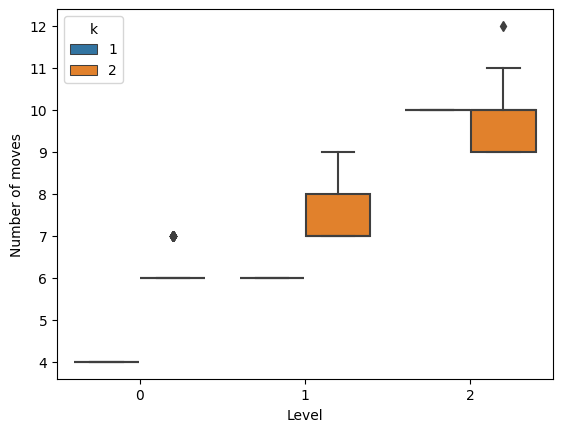

In [273]:
sns.boxplot(df_as_data, x ="Level", y="Number of moves", hue="k")

In [274]:
d = 4
as_level4_moves = []
all_data_level4 = []
for k in range(1,d): 
    levels = [0,1,2, 3]
    for l in levels: 
        as_level4_moves += as_data.tolist()[(d,k,l)]
        all_data_level4 += [[d, k, l]]*len(as_data.tolist()[(d,k,l)])
        print(as_data.tolist()[(d,k,l)])

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[10, 8, 8, 12, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 8, 10, 8, 10, 8, 8, 10, 12, 10, 10, 8, 10, 10, 8, 8, 8, 10, 10, 8, 8, 10, 10, 10, 8, 8, 8, 10, 10, 10, 10, 10, 10, 12, 8, 8, 10, 10, 8, 8, 8, 10, 8, 10, 10, 8, 10, 8, 10, 8, 10, 10, 8, 8, 10, 10, 8, 8, 8, 10, 10, 8, 12, 8, 8, 10, 12, 10, 10, 10, 8, 10, 8, 8, 12, 10, 8, 8, 10, 10, 8, 12, 8, 10, 10, 12, 10, 8, 10, 10, 8, 8, 10, 10, 10, 10, 8, 10, 8, 8, 10, 10, 8, 10, 8, 8, 10, 10, 10, 10, 8, 8, 10, 12, 10, 8, 8, 10, 8, 8, 10, 10, 8, 10, 10, 10, 10, 8, 8, 10, 8, 10, 10, 10, 10, 8, 10]
[6, 6, 6, 

In [275]:
df_as_data4 = pd.DataFrame(all_data_level4, columns=['d', 'k', 'Level'])
df_as_data4["Number of moves"] = pd.Series(as_level4_moves)

In [276]:
df_as_data4

,d,k,Level,Number of moves
0,4,1,0,4
1,4,1,0,4
2,4,1,0,4
3,4,1,0,4
4,4,1,0,4
...,...,...,...,...
1795,4,3,3,49
1796,4,3,3,41
1797,4,3,3,53
1798,4,3,3,39


<Axes: xlabel='Level', ylabel='Number of moves'>

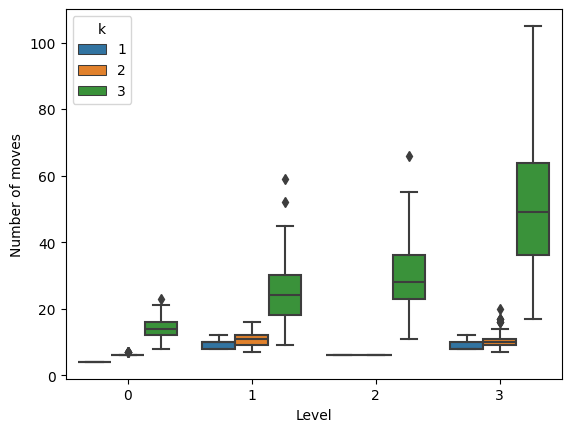

In [278]:
sns.boxplot(df_as_data4, x ="Level", y="Number of moves", hue="k")

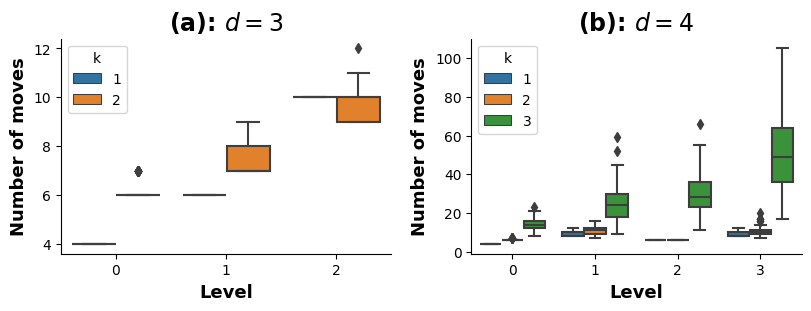

In [282]:
figure = plt.figure(constrained_layout=True, figsize=(8,3))
gs = figure.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel(r"Number of moves", weight='bold', fontsize=13)
ax.set_ylabel(r"Level", weight="bold", fontsize=13)
plt.title("(a): $d=3$", fontsize=17,weight="bold")
sns.boxplot(df_as_data, x ="Level", y="Number of moves", hue="k")
#sns.stripplot(df_as_data, x="level", y="Number of moves", size=1, color=".3")
ax = figure.add_subplot(gs[0,1])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel(r"Number of moves", weight='bold', fontsize=13)
ax.set_ylabel(r"Level", weight="bold", fontsize=13)
plt.title("(b): $d=4$", fontsize=17,weight="bold")
sns.boxplot(df_as_data4, x ="Level", y="Number of moves", hue="k")
plt.savefig("../images/RL_analysis.pdf")

## CPU Time analysis: A* search

In [332]:
d = 3
as_cputime_datad3 = []
for k in range(1,d): 
    levels = [0,1,2]
    for l in levels: 
        df = pd.read_csv("../data/as/dim/"+str(d)+"/k/"+str(k)+"/level"+str(l)+"/as_solutions100.csv")
        as_cputime_datad3 += [df]

as_data_dim3 = pd.concat(as_cputime_datad3)

In [333]:
as_data_dim3

,Unnamed: 0,d,k,l,level,Min,Moves,CPU Time
0,0,3,1,4,0,4,"[(7.0, 'blue'), (5.0, 'red'), (4.0, 'green'), ...",0.002488
1,1,3,1,4,0,4,"[(7.0, 'blue'), (5.0, 'red'), (4.0, 'green'), ...",0.002486
2,2,3,1,4,0,4,"[(7.0, 'blue'), (5.0, 'red'), (4.0, 'green'), ...",0.002140
3,3,3,1,4,0,4,"[(7.0, 'blue'), (5.0, 'red'), (4.0, 'green'), ...",0.002430
4,4,3,1,4,0,4,"[(7.0, 'blue'), (5.0, 'red'), (4.0, 'green'), ...",0.001411
...,...,...,...,...,...,...,...,...
95,95,3,2,4,2,9,"[(7.0, 'purple'), (6.0, 'red'), (2.0, 'blue'),...",0.215371
96,96,3,2,4,2,9,"[(7.0, 'purple'), (6.0, 'red'), (2.0, 'blue'),...",0.224189
97,97,3,2,4,2,9,"[(7.0, 'purple'), (6.0, 'red'), (2.0, 'blue'),...",0.215240
98,98,3,2,4,2,9,"[(7.0, 'purple'), (6.0, 'red'), (2.0, 'blue'),...",0.214851


<Axes: xlabel='level', ylabel='CPU Time'>

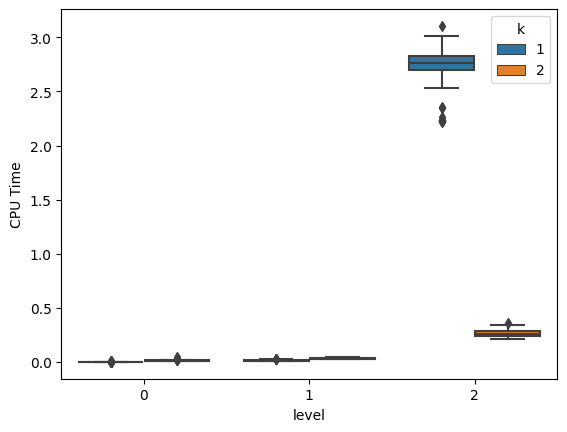

In [335]:
sns.boxplot(as_data_dim3, x="level", y="CPU Time", hue="k")

In [339]:
d = 4
as_cputime_datad4 = []
for k in range(1,d): 
    levels = [0,1,2,3]
    for l in levels: 
        df = pd.read_csv("../data/as/dim/"+str(d)+"/k/"+str(k)+"/level"+str(l)+"/as_solutions100.csv")
        as_cputime_datad4 += [df]

as_data_dim4 = pd.concat(as_cputime_datad4)

<Axes: xlabel='level', ylabel='CPU Time'>

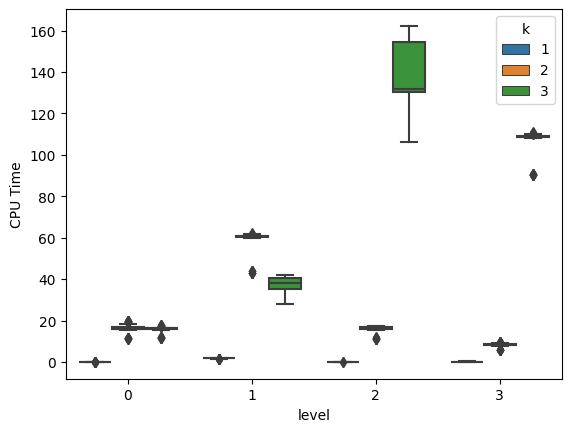

In [340]:
sns.boxplot(as_data_dim4, x="level", y="CPU Time", hue="k")

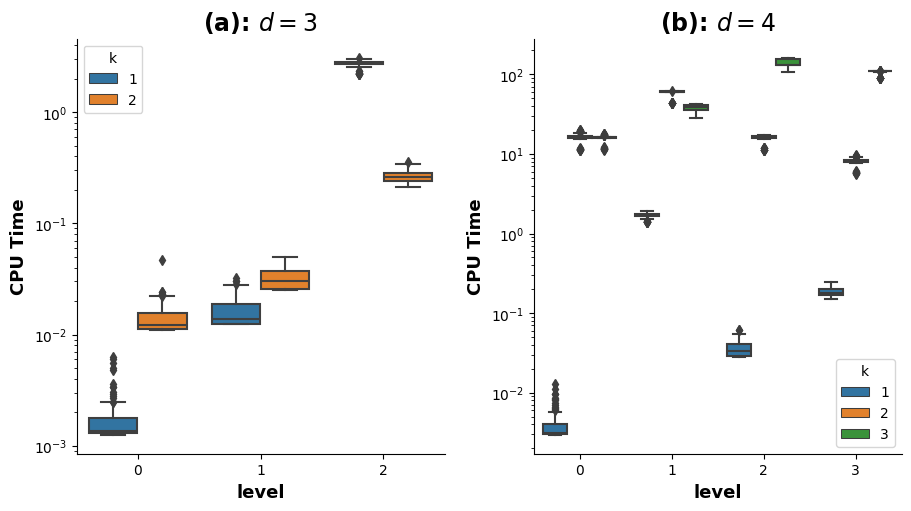

In [345]:
figure = plt.figure(constrained_layout=True, figsize=(9,5))
gs = figure.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlabel(r"Levels", weight='bold', fontsize=13)
ax.set_ylabel(r"CPU Time (s)", weight="bold", fontsize=13)
plt.title("(a): $d=3$", fontsize=17,weight="bold")
plt.yscale('log')
sns.boxplot(as_data_dim3, x="level", y="CPU Time", hue="k")
ax = figure.add_subplot(gs[0,1])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel(r"Levels", weight='bold', fontsize=13)
ax.set_ylabel(r"CPU Time (s)", weight="bold", fontsize=13)
plt.title("(b): $d=4$", fontsize=17,weight="bold")
plt.yscale('log')
sns.boxplot(as_data_dim4, x="level", y="CPU Time", hue="k")
plt.savefig("../images/AS_CPUTime.pdf")

In [347]:
as_data_dim4['CPU Time'].mean

<bound method Series.mean of 0      0.009621
1      0.003187
2      0.004920
3      0.006518
4      0.003547
        ...    
95    90.730153
96    90.351358
97    90.488349
98    90.585956
99    90.468003
Name: CPU Time, Length: 1200, dtype: float64>

In [351]:
as_data_dim4.groupby(['d', 'k', 'level'])['CPU Time'].mean()

d  k  level
4  1  0          0.004006
      1          1.693670
      2          0.036051
      3          0.184175
   2  0         16.262073
      1         59.039959
      2         15.882089
      3          8.111704
   3  0         15.819029
      1         37.434941
      2        136.986462
      3        107.186707
Name: CPU Time, dtype: float64

In [352]:
as_data_dim4

,Unnamed: 0,d,k,l,level,Min,Moves,CPU Time
0,0,4,1,11,0,4,"[(12.0, 'green'), (4.0, 'blue'), (5.0, 'red'),...",0.009621
1,1,4,1,11,0,4,"[(12.0, 'green'), (4.0, 'blue'), (5.0, 'red'),...",0.003187
2,2,4,1,11,0,4,"[(12.0, 'green'), (4.0, 'blue'), (5.0, 'red'),...",0.004920
3,3,4,1,11,0,4,"[(12.0, 'green'), (4.0, 'blue'), (5.0, 'red'),...",0.006518
4,4,4,1,11,0,4,"[(12.0, 'green'), (4.0, 'blue'), (5.0, 'red'),...",0.003547
...,...,...,...,...,...,...,...,...
95,95,4,3,11,3,10,"[(0.0, 'purple'), (8.0, 'red'), (10.0, 'blue')...",90.730153
96,96,4,3,11,3,10,"[(0.0, 'purple'), (8.0, 'red'), (10.0, 'blue')...",90.351358
97,97,4,3,11,3,10,"[(0.0, 'purple'), (8.0, 'red'), (10.0, 'blue')...",90.488349
98,98,4,3,11,3,10,"[(0.0, 'purple'), (8.0, 'red'), (10.0, 'blue')...",90.585956
